In [15]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt

In [16]:
bilinear_416_csv = genfromtxt('data/timing-origin_dataset_bilinear.csv', delimiter=',', dtype=None, encoding=None)
bicubic_416_csv = genfromtxt('data/timing-origin-dataset-default.csv', delimiter=',', dtype=None, encoding=None)
hamming_416_csv = genfromtxt('data/timing-origin_dataset_hamming.csv', delimiter=',', dtype=None, encoding=None)
lanczos_416_csv = genfromtxt('data/timing-origin_dataset_lanczos.csv', delimiter=',', dtype=None, encoding=None)

bilinear_256_csv = genfromtxt('data_256/timing-origin_dataset_bilinear.csv', delimiter=',', dtype=None, encoding=None)
bicubic_256_csv = genfromtxt('data_256/timing-origin_dataset.csv', delimiter=',', dtype=None, encoding=None)
hamming_256_csv = genfromtxt('data_256/timing-origin_dataset_hamming.csv', delimiter=',', dtype=None, encoding=None)
lanczos_256_csv = genfromtxt('data_256/timing-origin_dataset_lanczos.csv', delimiter=',', dtype=None, encoding=None)

bilinear_128_csv = genfromtxt('data_128/timing-origin_dataset_bilinear_128.csv', delimiter=',', dtype=None, encoding=None)
bicubic_128_csv = genfromtxt('data_128/timing-origin_dataset_128.csv', delimiter=',', dtype=None, encoding=None)
hamming_128_csv = genfromtxt('data_128/timing-origin_dataset_hamming_128.csv', delimiter=',', dtype=None, encoding=None)
lanczos_128_csv = genfromtxt('data_128/timing-origin_dataset_lanczos_128.csv', delimiter=',', dtype=None, encoding=None)

combined_data = np.concatenate( (bilinear_416_csv, bicubic_416_csv, hamming_416_csv, lanczos_416_csv,
bilinear_256_csv, bicubic_256_csv, hamming_256_csv, lanczos_256_csv,
bilinear_128_csv, bicubic_128_csv, hamming_128_csv, lanczos_128_csv ))

images_without_cups = ["1638858312.2182076.jpg",
"1638858980.1257513.jpg",
"1638859029.3403072.jpg",
"1638859059.827174.jpg",
"1638859082.9124146.jpg",
"1638859150.8668318.jpg",
"1638859154.4812253.jpg",
"1638859400.6757352.jpg",
"1638859456.9389522.jpg",
"1638859502.4543705.jpg",
"1638859540.9344175.jpg",
"1638859573.0005805.jpg",
"1638859580.7838762.jpg",
"1638858280.0541258.jpg"]

In [17]:
combined_data

array([('1638858998.8664625.jpg', 1.34257841, 0.49499059, 0.72234559, 0.68237829, 0.45775837, 10080),
       ('1638858998.8664625.jpg', 2.61680722, 0.44036603, 0.77007174, 0.7008388 , 0.45775837, 10080),
       ('1638858998.8664625.jpg', 1.27978849, 0.43973947, 0.74786425, 0.70721817, 0.45775837, 10080),
       ...,
       ('1638859483.8107712.jpg', 1.37722778, 0.56043148, 0.74472451, 0.67235756, 0.        ,  2249),
       ('1638859483.8107712.jpg', 1.37821078, 0.57099056, 0.73560667, 0.69772005, 0.        ,  2249),
       ('1638859483.8107712.jpg', 1.37770462, 0.59012532, 0.72140098, 0.67454457, 0.        ,  2249)],
      dtype=[('f0', '<U22'), ('f1', '<f8'), ('f2', '<f8'), ('f3', '<f8'), ('f4', '<f8'), ('f5', '<f8'), ('f6', '<i8')])

In [18]:
#images = set(x[0] for x in lanczos)


In [19]:
def average_data(csv):
    averaged = {} # key is image, value is array of data but averaged

    for i in range(0, len(csv), 5): # row of table
        avrg_array = [0]*6
        for j in range(1, 7): # column of table
            avrg_array[j-1] = np.mean([csv[k][j] for k in range(i, i+5)])
        averaged[csv[i][0]] = avrg_array

    return averaged

def accuracy_series(avrged_data):
    return [(value[4] if value[4] != 0 else 1) for value in avrged_data.values()]

def median_request_time(csv):
    """
    Assumes data has 5 consecutive entries for same test
    """
    image_list = []
    median_request_time = []
    for i in range(0, len(csv), 5):
        image_list.append(csv[i][6])
        median_request_time.append(
            np.median([csv[j][1] - csv[j][2] - csv[j][3] for j in range(i, i+5)])
        )
    return image_list, median_request_time


In [20]:
# bilinear_avrg = average_data(bilinear_csv)
# lanczos_avrg = average_data(lanczos_csv)
# bicubic_avrg = average_data(bicubic_csv)

In [21]:
# np.mean(accuracy_series(lanczos_avrg))

In [22]:
# np.mean(accuracy_series(bicubic_avrg))

In [23]:
# np.mean(accuracy_series(bilinear_avrg))

In [24]:
# np.mean([value[5] for value in bicubic_avrg.values()])

In [25]:
# np.mean([value[5] for value in lanczos_avrg.values()])

In [26]:
# np.mean([value[5] for value in bilinear_avrg.values()])

Text(0.5, 0, 'Image size (bytes)')

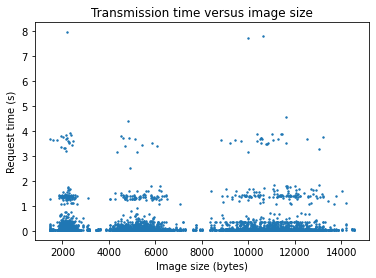

In [27]:
image_sizes = [x[6] for x in combined_data]
request_times = [x[1] - x[2] - x[3] for x in combined_data]

plt.scatter(image_sizes, request_times, s=2)
plt.title("Transmission time versus image size")
plt.ylabel("Request time (s)")
plt.xlabel("Image size (bytes)")


Text(0, 0.5, 'Transmission Time (s)')

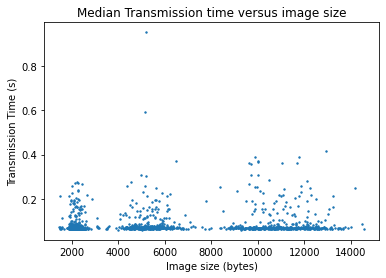

In [97]:
image_list, mrt =  median_request_time(combined_data)

plt.scatter(image_list, mrt, s=2)
plt.title("Median Transmission time versus image size")
plt.xlabel("Image size (bytes)")
plt.ylabel("Transmission Time (s)")

In [29]:
bilinear_416_average_total_time = np.mean([x[1] for x in bilinear_416_csv])
bicubic_416_average_total_time = np.mean([x[1] for x in bicubic_416_csv])
hamming_416_average_total_time = np.mean([x[1] for x in hamming_416_csv])
lanczos_416_average_total_time = np.mean([x[1] for x in lanczos_416_csv])

bilinear_256_average_total_time = np.mean([x[1] for x in bilinear_256_csv])
bicubic_256_average_total_time = np.mean([x[1] for x in bicubic_256_csv])
hamming_256_average_total_time = np.mean([x[1] for x in hamming_256_csv])
lanczos_256_average_total_time = np.mean([x[1] for x in lanczos_256_csv])

bilinear_128_average_total_time = np.mean([x[1] for x in bilinear_128_csv])
bicubic_128_average_total_time = np.mean([x[1] for x in bicubic_128_csv])
hamming_128_average_total_time = np.mean([x[1] for x in hamming_128_csv])
lanczos_128_average_total_time = np.mean([x[1] for x in lanczos_128_csv])


(0.0, 2.0)

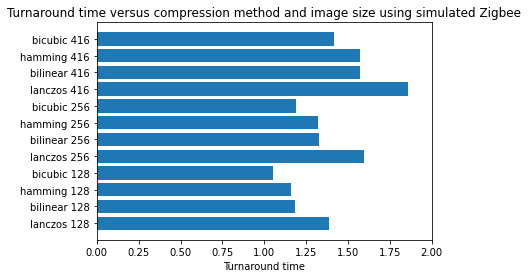

In [74]:
fig, ax = plt.subplots()
cases = (
    "bicubic 416", 
    "hamming 416", 
    "bilinear 416",
    "lanczos 416", 
    "bicubic 256", 
    "hamming 256",
    "bilinear 256", 
    "lanczos 256",
    "bicubic 128",
    "hamming 128",
    "bilinear 128",
    "lanczos 128"
)

#  x[1]-(x[1] - x[2] - x[3])+x[6]/zigbee rate
#  x[2]+x[3] + x[6]/zigbee_rate
zigbee_rate = 250 * 1000/ 8 # 250 kbps converted to bytes per second
average_total_time_arr_zigbee = (
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in bicubic_416_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in hamming_416_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in bilinear_416_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in lanczos_416_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in bicubic_256_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in hamming_256_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in bilinear_256_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in lanczos_256_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in bicubic_128_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in hamming_128_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in bilinear_128_csv]),
  np.mean([x[2] + x[3] + x[6]/zigbee_rate for x in lanczos_128_csv])
)


y_pos =range(len(cases))
ax.barh(y_pos, average_total_time_arr_zigbee, align='center') #, xerr=error
ax.set_yticks(y_pos, labels=cases)
ax.invert_yaxis()  # labels read top-to-bottom
plt.title("Turnaround time versus compression method and image size using simulated Zigbee")
plt.xlabel("Turnaround time")
ax.set_xlim(0, 2)

(0.0, 2.0)

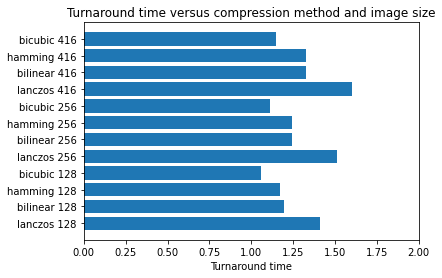

In [75]:
fig, ax = plt.subplots()
cases = (
    "bicubic 416", 
    "hamming 416", 
    "bilinear 416",
    "lanczos 416", 
    "bicubic 256", 
    "hamming 256",
    "bilinear 256", 
    "lanczos 256",
    "bicubic 128",
    "hamming 128",
    "bilinear 128",
    "lanczos 128"
)

def mean_of_medians_of_total_time(csv):
    medians_only = []
    for i in range(0,len(csv),5):
        medians_only.append(np.median([t[1] for t in csv[i:i+5]]))
    return np.mean(medians_only)

average_total_time_arr = (
  mean_of_medians_of_total_time(bicubic_416_csv),
  mean_of_medians_of_total_time(hamming_416_csv),
  mean_of_medians_of_total_time(bilinear_416_csv),
  mean_of_medians_of_total_time(lanczos_416_csv),
  mean_of_medians_of_total_time(bicubic_256_csv),
  mean_of_medians_of_total_time(hamming_256_csv),
  mean_of_medians_of_total_time(bilinear_256_csv),
  mean_of_medians_of_total_time(lanczos_256_csv),
  mean_of_medians_of_total_time(bicubic_128_csv),
  mean_of_medians_of_total_time(hamming_128_csv),
  mean_of_medians_of_total_time(bilinear_128_csv),
  mean_of_medians_of_total_time(lanczos_128_csv)
)


y_pos =range(len(cases))
ax.barh(y_pos, average_total_time_arr, align='center') #, xerr=error
ax.set_yticks(y_pos, labels=cases)
ax.invert_yaxis()  # labels read top-to-bottom
plt.title("Turnaround time versus compression method and image size")
plt.xlabel("Turnaround time")
ax.set_xlim(0, 2)

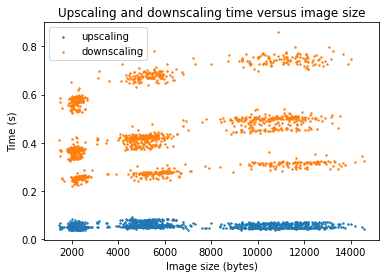

In [89]:
def median_upscaling_time(csv):
    """
    Assumes data has 5 consecutive entries for same test
    """
    image_list = []
    median_request_time = []
    for i in range(0, len(csv), 5):
        image_list.append(csv[i][6])
        median_request_time.append(
            np.median([csv[j][3]-csv[j][4] for j in range(i, i+5)])
        )
    return image_list, median_request_time

def median_downscaling_time(csv):
    """
    Assumes data has 5 consecutive entries for same test
    """
    image_list = []
    median_request_time = []
    for i in range(0, len(csv), 5):
        image_list.append(csv[i][6])
        median_request_time.append(
            np.median([csv[j][2] for j in range(i, i+5)])
        )
    return image_list, median_request_time

image_sizes2, downscaling_time = median_downscaling_time(combined_data)
image_sizes, upscaling_time = median_upscaling_time(combined_data)

plt.scatter(image_sizes, upscaling_time, s=2, label="upscaling")
plt.scatter(image_sizes2, downscaling_time, s=2, label="downscaling")
plt.title("Upscaling and downscaling time versus image size")
plt.ylabel("Time (s)")
plt.xlabel("Image size (bytes)")
plt.legend()

(0.0, 0.8)

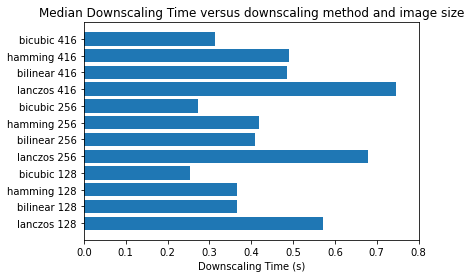

In [98]:
fig, ax = plt.subplots()
cases = (
    "bicubic 416", 
    "hamming 416", 
    "bilinear 416",
    "lanczos 416", 
    "bicubic 256", 
    "hamming 256",
    "bilinear 256", 
    "lanczos 256",
    "bicubic 128",
    "hamming 128",
    "bilinear 128",
    "lanczos 128"
)

def mean_of_medians_of_downscaling_time(csv):
    medians_only = []
    for i in range(0,len(csv),5):
        medians_only.append(np.median([t[2] for t in csv[i:i+5]]))
    return np.mean(medians_only)

average_total_time_arr = (
  mean_of_medians_of_downscaling_time(bicubic_416_csv),
  mean_of_medians_of_downscaling_time(hamming_416_csv),
  mean_of_medians_of_downscaling_time(bilinear_416_csv),
  mean_of_medians_of_downscaling_time(lanczos_416_csv),
  mean_of_medians_of_downscaling_time(bicubic_256_csv),
  mean_of_medians_of_downscaling_time(hamming_256_csv),
  mean_of_medians_of_downscaling_time(bilinear_256_csv),
  mean_of_medians_of_downscaling_time(lanczos_256_csv),
  mean_of_medians_of_downscaling_time(bicubic_128_csv),
  mean_of_medians_of_downscaling_time(hamming_128_csv),
  mean_of_medians_of_downscaling_time(bilinear_128_csv),
  mean_of_medians_of_downscaling_time(lanczos_128_csv)
)


y_pos =range(len(cases))
ax.barh(y_pos, average_total_time_arr, align='center') #, xerr=error
ax.set_yticks(y_pos, labels=cases)
ax.invert_yaxis()  # labels read top-to-bottom
plt.title("Median Downscaling Time versus downscaling method and image size")
plt.xlabel("Downscaling Time (s)")
ax.set_xlim(0, 0.8)

(0.0, 0.8)

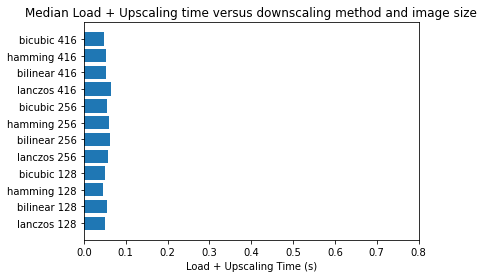

In [96]:
fig, ax = plt.subplots()
cases = (
    "bicubic 416", 
    "hamming 416", 
    "bilinear 416",
    "lanczos 416", 
    "bicubic 256", 
    "hamming 256",
    "bilinear 256", 
    "lanczos 256",
    "bicubic 128",
    "hamming 128",
    "bilinear 128",
    "lanczos 128"
)

def mean_of_medians_of_upscaling_time(csv):
    medians_only = []
    for i in range(0,len(csv),5):
        medians_only.append(np.median([t[3]-t[4] for t in csv[i:i+5]]))
    return np.mean(medians_only)

average_total_time_arr = (
  mean_of_medians_of_upscaling_time(bicubic_416_csv),
  mean_of_medians_of_upscaling_time(hamming_416_csv),
  mean_of_medians_of_upscaling_time(bilinear_416_csv),
  mean_of_medians_of_upscaling_time(lanczos_416_csv),
  mean_of_medians_of_upscaling_time(bicubic_256_csv),
  mean_of_medians_of_upscaling_time(hamming_256_csv),
  mean_of_medians_of_upscaling_time(bilinear_256_csv),
  mean_of_medians_of_upscaling_time(lanczos_256_csv),
  mean_of_medians_of_upscaling_time(bicubic_128_csv),
  mean_of_medians_of_upscaling_time(hamming_128_csv),
  mean_of_medians_of_upscaling_time(bilinear_128_csv),
  mean_of_medians_of_upscaling_time(lanczos_128_csv)
)


y_pos =range(len(cases))
ax.barh(y_pos, average_total_time_arr, align='center') #, xerr=error
ax.set_yticks(y_pos, labels=cases)
ax.invert_yaxis()  # labels read top-to-bottom
plt.title("Median Load + Upscaling time versus downscaling method and image size")
plt.xlabel("Load + Upscaling Time (s)")
ax.set_xlim(0, 0.8)

In [48]:
average_total_time_arr

(1.261281568004239,
 1.404816537134109,
 1.4417088866233825,
 1.7530157358415666,
 1.1873478524146541,
 1.3105092317827287,
 1.29372274568004,
 1.5705494911439957,
 1.1703634808140417,
 1.2515847121515582,
 1.3100273363051875,
 1.4812695318652738)

In [58]:
x= 
np.array(x) <average_total_time_arr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [84]:
[ x[4] for x in bicubic_416_csv]

[0.7009391784667969,
 0.6819775104522705,
 0.7081689834594727,
 0.684565544128418,
 0.7044456005096436,
 0.6568331718444824,
 0.7262296676635742,
 0.681812047958374,
 0.6965982913970947,
 0.6652357578277588,
 0.6686785221099854,
 0.6563084125518799,
 0.7161223888397217,
 0.986659049987793,
 0.6703712940216064,
 0.6968920230865479,
 0.7162516117095947,
 0.668482780456543,
 0.7042303085327148,
 0.7031459808349609,
 0.6945178508758545,
 0.6897590160369873,
 0.6799085140228271,
 0.7184939384460449,
 0.6966192722320557,
 0.7228209972381592,
 0.7350740432739258,
 0.6814203262329102,
 0.6869175434112549,
 0.7100827693939209,
 0.687152624130249,
 0.6656501293182373,
 0.6897091865539551,
 0.6928706169128418,
 0.702672004699707,
 0.6429257392883301,
 0.7233448028564453,
 0.6733829975128174,
 0.6696488857269287,
 0.6924140453338623,
 0.6870486736297607,
 0.6924729347229004,
 0.686370849609375,
 0.716526985168457,
 0.7043073177337646,
 0.6815755367279053,
 0.7019336223602295,
 0.7124423980712891,
